In [1]:
import geopandas as gpd

In [2]:

# Gem_df = gpd.read_file(
#     "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/03_GitHub/data/swissBOUNDARIES3D_1_5_LV95_LN02.gpkg", layer = "tlm_hoheitsgebiet")

# print(Gem_df.head())

In [3]:
# Gem_df_CH = Gem_df[Gem_df['icc'] == 'CH']

# print(Gem_df_CH.head())

In [4]:
# BB_df = gpd.read_file("C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/BB_CH_Gesamt.gpkg")

# print(BB_df.head())

In [5]:
# BB_df_Vs = BB_df[BB_df['Kanton'] == 'VS']
# print(BB_df_Vs.head())

In [6]:
# BB_df_Vs.to_file(
    # "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/BB_VS.gpkg", layer = "BB_VS", driver="GPKG")

In [7]:
BB_df_Vs = gpd.read_file(
    "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/BB_VS.gpkg")

print(BB_df_Vs.head())

c:\Users\aebim\anaconda3\envs\5230_As\lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'BB_VS.gpkg': 'BB_VS' (default), 'diff_BB', 'fehlende_Fla'. Specify layer parameter to avoid this warning.
  result = read_func(


  BFSNr Qualitaet                 Art   GWR_EGID Kanton layer  \
0  6156      AV93            Gebaeude     929034     VS  lcsf   
1  6153      AV93            Gebaeude  504216988     VS  lcsf   
2  6156      AV93  uebrige_befestigte       None     VS  lcsf   
3  6213      AV93            Gebaeude     936195     VS  lcsf   
4  6213      AV93  uebrige_befestigte       None     VS  lcsf   

                                                path  \
0  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
1  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
2  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
3  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
4  C:/Users/aebim/Documents/02_Ausbildung/Studium...   

                                            geometry  
0  MULTIPOLYGON (((2555542.76 1120750.08, 2555546...  
1  MULTIPOLYGON (((2563998.987 1122515.36, 256401...  
2  MULTIPOLYGON (((2555542.006 1120741.805, 25555...  
3  MULTIPOLYGON (((2567985.349 1114249.21, 256799...

In [8]:
Gem_df_CH = gpd.read_file("C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/03_GitHub/data/preprocessing/av/04_Vollstaendigkeit/QGIS_export/Gemeinden_VS.gpkg")
print(Gem_df_CH.head())

    id                                    uuid datum_aenderung  \
0   36  {6A860CA9-82BB-4F78-A290-C58CCB8F43CD}      2024-10-18   
1   87  {5D45CF9A-020B-4690-B8D4-880618E106DC}      2024-10-18   
2  109  {A0666C83-BD60-4F2B-991C-6FF92BC46110}      2024-10-18   
3  126  {6E193D0B-22E1-4DD1-8DD8-9B3FA88696C4}      2024-10-18   
4  133  {D25BA035-F8B9-47B8-98E6-C22D2FA81982}      2024-10-18   

  datum_erstellung  erstellung_jahr  erstellung_monat grund_aenderung  \
0       2008-11-24             1997                 1      Verbessert   
1       2008-11-24             1999                 1      Verbessert   
2       2008-11-24             1997                 1      Verbessert   
3       2008-11-24             1997                 1      Verbessert   
4       2008-11-24             1997                 1      Verbessert   

    herkunft  herkunft_jahr  herkunft_monat  ...  bezirksnummer  \
0  swisstopo           2025               1  ...           2311   
1  swisstopo           2025   

In [9]:
# differenz = gpd.overlay(Gem_df_CH, BB_df_Vs, how="difference")
# print("Schnittflächen mit Overlay berechnet erfolgreich.")

In [10]:

# import matplotlib.pyplot as plt

# # ensure same CRS
# if Gem_df_CH.crs != BB_df_Vs.crs:
#     BB_df_Vs = BB_df_Vs.to_crs(Gem_df_CH.crs)

# fig, ax = plt.subplots(figsize=(10, 10))

# differenz.plot(ax=ax, color='pink', edgecolor='none', alpha=0.6, label='Gem_df_CH minus BB_df_Vs')
# BB_df_Vs.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.8, label='BB_df_Vs')

# ax.legend()
# ax.set_title('Gem_df_CH und BB_df_VS (difference)')
# ax.set_axis_off()
# plt.show()


In [11]:
# differenz.to_file(
    # "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/03_GitHub/data/preprocessing/av/04_Vollstaendigkeit/keine_BB.gpkg",
    # driver="GPKG")

In [12]:
Gem_df_CH["area_total"] = Gem_df_CH.geometry.area

In [13]:
BB_df_Vs_Union = BB_df_Vs.union_all()


In [25]:
# Convert the unified geometry to a GeoDataFrame
BB_gdf = gpd.GeoDataFrame(geometry=[BB_df_Vs_Union], crs=Gem_df_CH.crs)

# Now perform the overlay
differenz_Union = gpd.overlay(Gem_df_CH, BB_gdf, how="difference")

In [15]:
print(differenz_Union.columns)

Index(['id', 'uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr',
       'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr',
       'herkunft_monat', 'revision_jahr', 'revision_monat',
       'revision_qualitaet', 'objektart', 'bfs_nummer', 'bezirksnummer',
       'kantonsnummer', 'name', 'gem_flaeche', 'see_flaeche', 'icc', 'shn',
       'einwohnerzahl', 'hist_nr', 'geometry', 'area_total'],
      dtype='object')


In [48]:
differenz_Union["area_diff"] = differenz_Union.geometry.area
differenz_Union["prozent_diff"] = (differenz_Union["area_diff"] / differenz_Union["area_total"]) * 100

print(differenz_Union.columns)

Index(['id', 'uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr',
       'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr',
       'herkunft_monat', 'revision_jahr', 'revision_monat',
       'revision_qualitaet', 'objektart', 'bfs_nummer', 'bezirksnummer',
       'kantonsnummer', 'name', 'gem_flaeche', 'see_flaeche', 'icc', 'shn',
       'einwohnerzahl', 'hist_nr', 'geometry', 'area_total', 'area_diff',
       'prozent_diff'],
      dtype='object')


In [51]:
fehlende_Flaeche = differenz_Union[differenz_Union["prozent_diff"] > 99]

In [52]:
# differenz_Union.to_file(
#     "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/differenz_Union.gpkg", layer = "diff_BB", driver="GPKG")

fehlende_Flaeche.to_file(
    "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/fehlende_Flaeche.gpkg", layer = "fehlende_Fla", driver="GPKG")

In [ ]:
# differenz_Union=gpd.read_file(
#     "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/differenz_Union.gpkg", layer = "diff_BB")

# fehlende_Flaeche=gpd.read_file(
#     "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/fehlende_Flaeche.gpkg", layer = "fehlende_Fla")

C:\Users\aebim\AppData\Local\Temp\ipykernel_23196\1565146592.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\aebim\AppData\Local\Temp\ipykernel_23196\1565146592.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


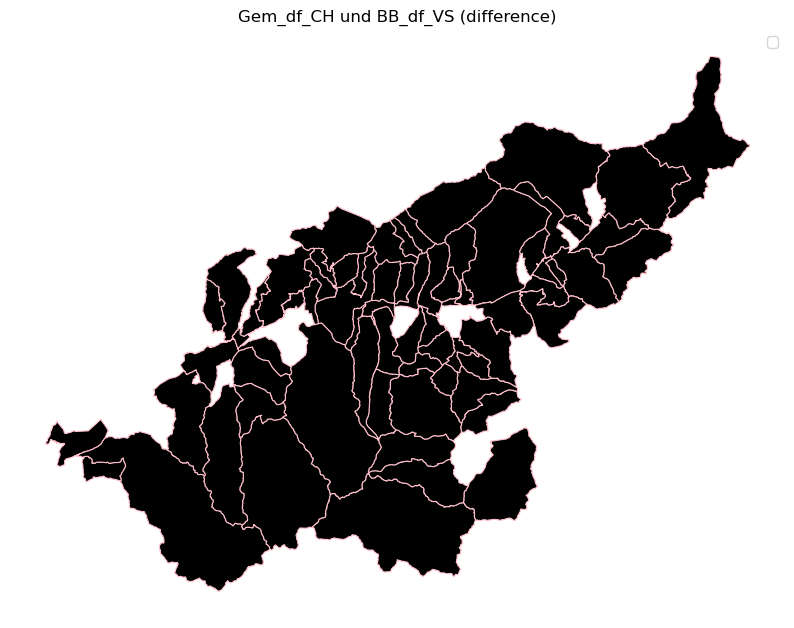

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

# fehlende_Flaeche.plot(ax=ax, color='pink', edgecolor='none', alpha=0.6, label='Gem_df_CH minus BB_df_Vs')
# Gem_df_CH.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.8, label='BB_df_Vs')


# BB_gdf = gpd.GeoDataFrame(geometry=[BB_df_Vs_Union])
# Gem_df_CH.plot(ax=ax, facecolor='pink', edgecolor='red', linewidth=0.8, label='BB_df_Vs')
# differenz_Union.plot(ax=ax, facecolor='black', edgecolor='pink', linewidth=0.8, label='BB_df_Vs')
fehlende_Flaeche.plot(ax=ax, facecolor='black', edgecolor='pink', linewidth=0.8, label='BB_df_Vs')
# BB_gdf.plot(ax=ax, facecolor='red', edgecolor='none', linewidth=0.8, label='BB_df_Vs')


ax.legend()
ax.set_title('Gem_df_CH und BB_df_VS (difference)')
ax.set_axis_off()
plt.show()

In [33]:
print(differenz_Union)

       id                                    uuid datum_aenderung  \
0      36  {6A860CA9-82BB-4F78-A290-C58CCB8F43CD}      2024-10-18   
1      87  {5D45CF9A-020B-4690-B8D4-880618E106DC}      2024-10-18   
2     109  {A0666C83-BD60-4F2B-991C-6FF92BC46110}      2024-10-18   
3     126  {6E193D0B-22E1-4DD1-8DD8-9B3FA88696C4}      2024-10-18   
4     133  {D25BA035-F8B9-47B8-98E6-C22D2FA81982}      2024-10-18   
..    ...                                     ...             ...   
116  2008  {9FF3641F-E01D-4B79-A018-B62430C7EFF2}      2024-10-18   
117  2054  {568B1D39-08A8-464A-836B-F2D76DA6C96F}      2024-10-18   
118  2110  {7CC21958-6FBB-4F93-91D6-FA9CD781D5E1}      2024-10-18   
119  2119  {B8AC958F-CAC6-45E8-8F83-91FCFAA17B1A}      2024-10-21   
120  2139  {6A9CB4F2-4113-4088-8AB8-1C7394D4C706}      2024-10-18   

    datum_erstellung  erstellung_jahr  erstellung_monat grund_aenderung  \
0         2008-11-24             1997                 1      Verbessert   
1         2008-11-24 

In [5]:
import os

path = os.getcwd()
path = os.path.normpath(path)  # normalize path separators

gem_CH_datei = r"data\swissBOUNDARIES3D_1_5_LV95_LN02.gpkg"
BB_CH_datei = r"data\preprocessing\av\BB_CH_Gesamt.gpkg"

gem_CH_dir = os.path.join(path,gem_CH_datei)
BB_CH_dir = os.path.join(path,BB_CH_datei)

print("Pfade Definiert")

print(gem_CH_dir)
print(BB_CH_dir)

Pfade Definiert
c:\Users\aebim\Documents\02_Ausbildung\Studium\05_Semester\5230_Geoniformatik_Raumanalyse\Projektarbeit\03_GitHub\scripts\preprocessing\av\04_Vollstaendigkeit\data\swissBOUNDARIES3D_1_5_LV95_LN02.gpkg
c:\Users\aebim\Documents\02_Ausbildung\Studium\05_Semester\5230_Geoniformatik_Raumanalyse\Projektarbeit\03_GitHub\scripts\preprocessing\av\04_Vollstaendigkeit\data\preprocessing\av\BB_CH_Gesamt.gpkg


In [1]:
import os

test = os.getcwd()

print (test)

c:\Users\aebim\Documents\02_Ausbildung\Studium\05_Semester\5230_Geoniformatik_Raumanalyse\Projektarbeit\03_GitHub\scripts\preprocessing\av\04_Vollstaendigkeit


In [2]:
import geopandas as gpd
from shapely.validation import explain_validity, make_valid

# 1. Einlesen deiner Geopackage-Datei
gdf = gpd.read_file(r"C:\Users\aebim\Documents\02_Ausbildung\Studium\05_Semester\5230_Geoniformatik_Raumanalyse\Projektarbeit\03_GitHub\data\preprocessing\av\BB_CH_Gesamt.gpkg")

# 2. Überprüfen, ob alle Geometrien gültig sind
gdf["is_valid"] = gdf.geometry.is_valid
print(gdf["is_valid"].value_counts())

# 3. Anzeigen der ungültigen Geometrien
invalid = gdf[~gdf["is_valid"]]
print(invalid.shape)
print(invalid.apply(lambda row: explain_validity(row.geometry), axis=1))

# 4. Reparieren der Geometrien (Shapely 2.x)
gdf["geometry"] = gdf["geometry"].apply(make_valid)
print("Geometrien repariert.")
# 5. Erneut prüfen
print(gdf.geometry.is_valid.value_counts())

# 6. Jetzt kannst du sicher union_all ausführen
# BB_CH_Union = gdf.union_all()


is_valid
True     7200408
False        127
Name: count, dtype: int64
(127, 9)
6722632    Self-intersection[2676323.2760068 1219837.8535...
6730592    Self-intersection[2637320.93218429 1230072.604...
6741862    Self-intersection[2666181.01999462 1213086.921...
6744731    Self-intersection[2667340.22340985 1210219.294...
6751809    Self-intersection[2662575.56275246 1212079.295...
                                 ...                        
7089067    Self-intersection[2650937.35650112 1226161.253...
7090365    Self-intersection[2640530.30926836 1227247.435...
7096219    Self-intersection[2670305.49415753 1212701.956...
7099465    Self-intersection[2665033.00241157 1222184.002...
7101461    Self-intersection[2663978.44922065 1226154.491...
Length: 127, dtype: object
Geometrien repariert.
True    7200535
Name: count, dtype: int64


In [ ]:
gdf.to_file(r"C:\Users\aebim\Documents\02_Ausbildung\Studium\05_Semester\5230_Geoniformatik_Raumanalyse\Projektarbeit\03_GitHub\data\preprocessing\av\BB_CH_Gesamt.gpkg", driver="GPKG")